In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## A production company has asked us for advice regarding the investment on a new film. Their main concern is the profit they will be able to make from their new movie. Hence the analysis here will be carried out based only on the potential profit the company will make by creating a new movie

In [2]:
fmovies = pd.read_csv('/Users/traulosspyros/Desktop/Big Blue Data Academy/spyros-travlos-exercises/P1-Movies/Data/IMDb movies_Cleaned.csv')

In [3]:
fmovies['usa_gross_income'].max()

936

In [4]:
fmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  int64  
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
fmovies['year'].max()

2020

In [6]:
fmovies_year = fmovies.groupby('year')['imdb_title_id'].count()
fmovies_year.head()

year
1894     1
1906     1
1911     5
1912     5
1913    13
Name: imdb_title_id, dtype: int64

<AxesSubplot:title={'center':'Movies Released each year'}, xlabel='Year', ylabel='Number of Movies'>

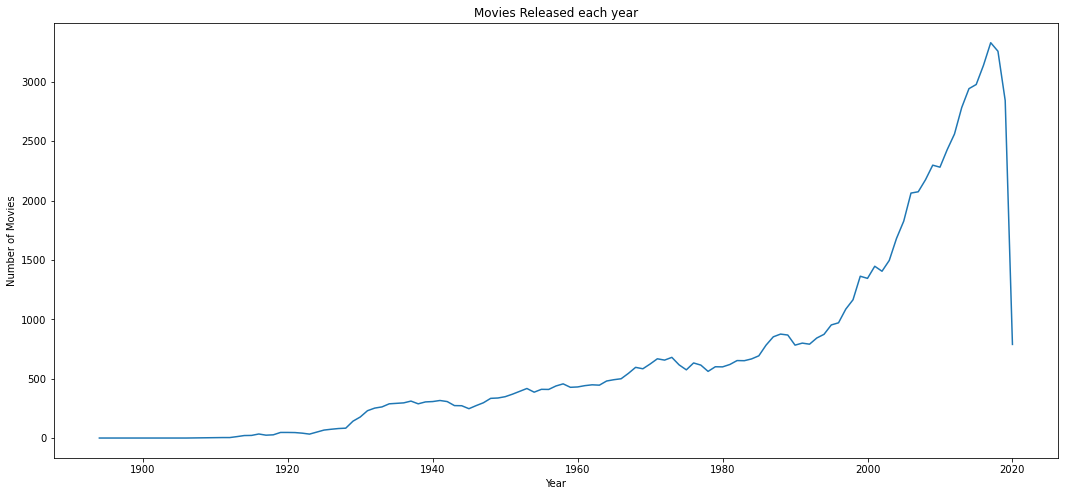

In [7]:


fmovies_year.plot(figsize = (18,8), title = 'Movies Released each year', xlabel = 'Year', ylabel = 'Number of Movies')

### Find the movies with the highest income both in USA and Worlwide

In [8]:
#Usa_gross_income
fmovies['usa_gross_income'] = fmovies['usa_gross_income'].replace(0, np.nan)

In [9]:
fmovies.dropna(subset = ['usa_gross_income'], inplace = True)

In [10]:
fmovies['date_published'].max()

'2021-01-01'

In [11]:
usa_movies = fmovies.sort_values(by = ['usa_gross_income'], ascending = False).head(10)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Star Wars: Episode VII - The Force Awakens'),
  Text(1, 0, 'Avengers: Endgame'),
  Text(2, 0, 'Avatar'),
  Text(3, 0, 'Black Panther'),
  Text(4, 0, 'Avengers: Infinity War'),
  Text(5, 0, 'Titanic'),
  Text(6, 0, 'Jurassic World'),
  Text(7, 0, 'The Avengers'),
  Text(8, 0, 'Star Wars: Episode VIII - The Last Jedi'),
  Text(9, 0, 'Incredibles 2')])

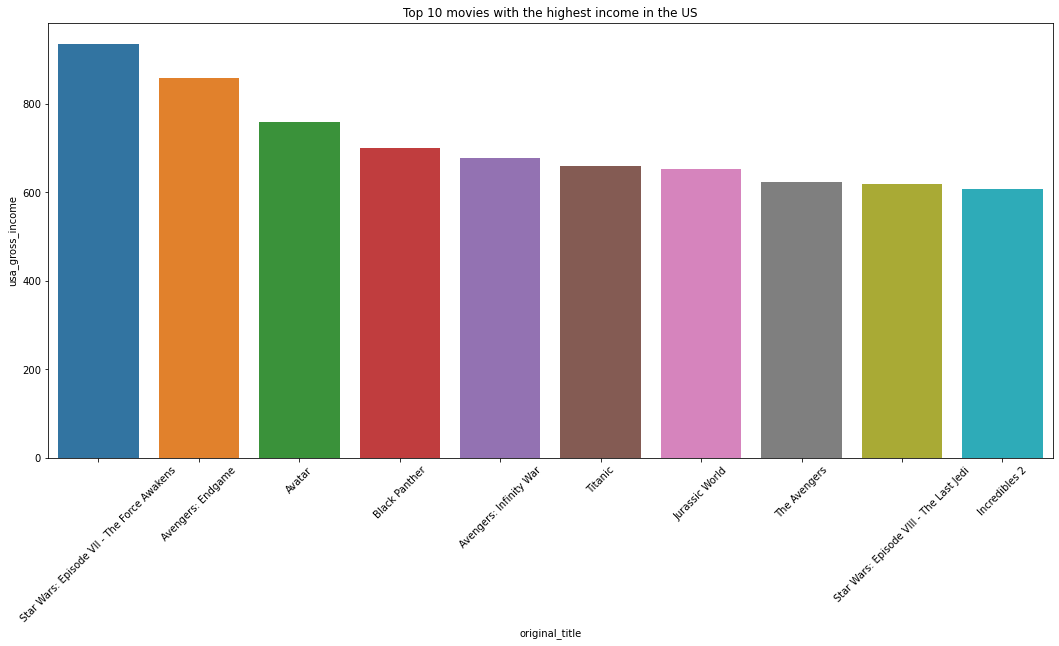

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="usa_gross_income", data=usa_movies).set_title('Top 10 movies with the highest income in the US')
plt.xticks(rotation=45)


In [13]:
#worlwide_gross_income

fmovies['worlwide_gross_income'] = fmovies['worlwide_gross_income'].replace(0, np.nan)

In [14]:
fmovies.dropna(subset = ['worlwide_gross_income'], inplace = True)

In [15]:
fmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 245 to 85838
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          7703 non-null   object 
 1   title                  7703 non-null   object 
 2   original_title         7703 non-null   object 
 3   year                   7703 non-null   int64  
 4   date_published         7703 non-null   object 
 5   genre                  7703 non-null   object 
 6   duration               7703 non-null   int64  
 7   country                7702 non-null   object 
 8   language               7698 non-null   object 
 9   director               7701 non-null   object 
 10  writer                 7695 non-null   object 
 11  production_company     7676 non-null   object 
 12  actors                 7701 non-null   object 
 13  description            7687 non-null   object 
 14  avg_vote               7703 non-null   float64
 15  v

In [16]:
world_movies = fmovies.sort_values(by = ['worlwide_gross_income'], ascending = False).head(10)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avengers: Endgame'),
  Text(1, 0, 'Avatar'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'Star Wars: Episode VII - The Force Awakens'),
  Text(4, 0, 'Avengers: Infinity War'),
  Text(5, 0, 'Jurassic World'),
  Text(6, 0, 'The Lion King'),
  Text(7, 0, 'The Avengers'),
  Text(8, 0, 'Fast & Furious 7'),
  Text(9, 0, 'Frozen II')])

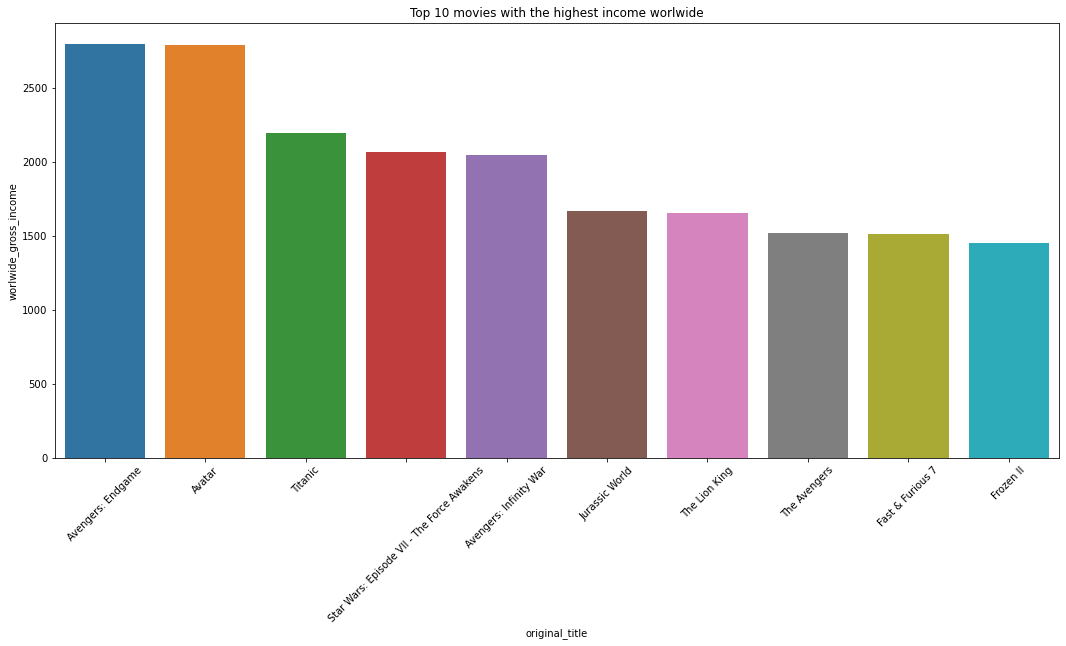

In [17]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="worlwide_gross_income", data=world_movies).set_title('Top 10 movies with the highest income worlwide')
plt.xticks(rotation=45)



In [18]:
#Let's find the total income of movies and see the top 10
fmovies['Total Income'] = fmovies['worlwide_gross_income'] + fmovies['usa_gross_income']


In [19]:
fmovies['Total Income'].max()

3655.0

In [20]:
total_income = fmovies.sort_values(by = ['Total Income'], ascending = False).head(10)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avengers: Endgame'),
  Text(1, 0, 'Avatar'),
  Text(2, 0, 'Star Wars: Episode VII - The Force Awakens'),
  Text(3, 0, 'Titanic'),
  Text(4, 0, 'Avengers: Infinity War'),
  Text(5, 0, 'Jurassic World'),
  Text(6, 0, 'The Lion King'),
  Text(7, 0, 'The Avengers'),
  Text(8, 0, 'Black Panther'),
  Text(9, 0, 'Star Wars: Episode VIII - The Last Jedi')])

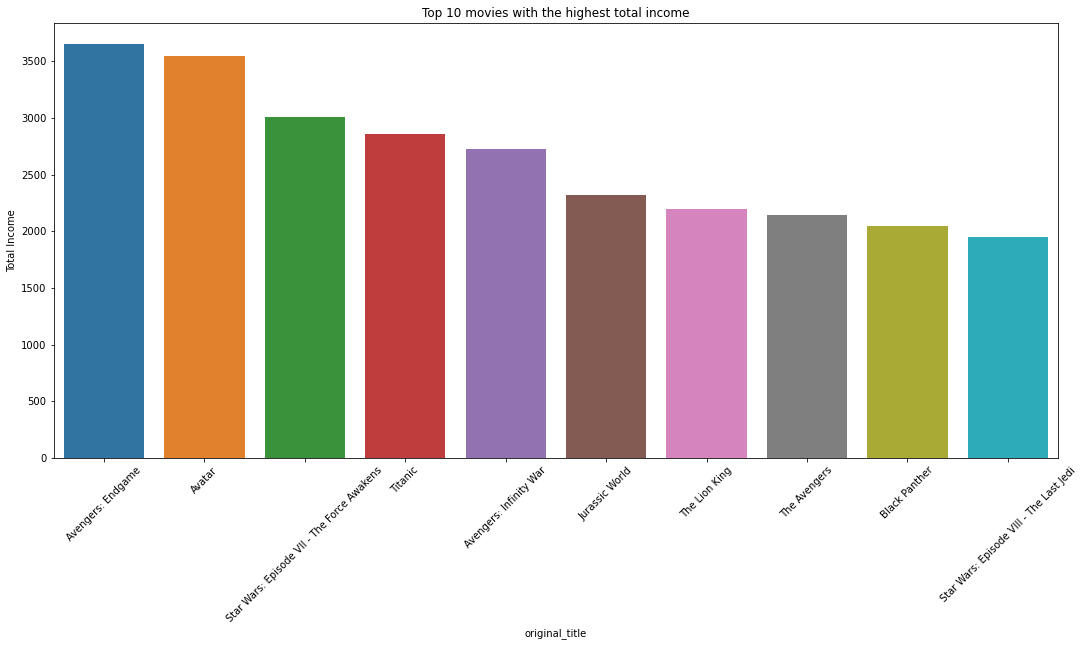

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="Total Income", data=total_income).set_title('Top 10 movies with the highest total income')
plt.xticks(rotation=45)

### Now we need to add a new column named Profit which will allow for us to see which movies were the most profitable

In [22]:
#First we need to drop the columns for which the budget is zero
fmovies['budget'] = fmovies['budget'].replace(0, np.nan)

In [23]:
fmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 245 to 85838
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          7703 non-null   object 
 1   title                  7703 non-null   object 
 2   original_title         7703 non-null   object 
 3   year                   7703 non-null   int64  
 4   date_published         7703 non-null   object 
 5   genre                  7703 non-null   object 
 6   duration               7703 non-null   int64  
 7   country                7702 non-null   object 
 8   language               7698 non-null   object 
 9   director               7701 non-null   object 
 10  writer                 7695 non-null   object 
 11  production_company     7676 non-null   object 
 12  actors                 7701 non-null   object 
 13  description            7687 non-null   object 
 14  avg_vote               7703 non-null   float64
 15  v

In [24]:
fmovies.dropna(subset = ['budget'], inplace = True)

In [25]:
fmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 506 to 85740
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5820 non-null   object 
 1   title                  5820 non-null   object 
 2   original_title         5820 non-null   object 
 3   year                   5820 non-null   int64  
 4   date_published         5820 non-null   object 
 5   genre                  5820 non-null   object 
 6   duration               5820 non-null   int64  
 7   country                5820 non-null   object 
 8   language               5819 non-null   object 
 9   director               5820 non-null   object 
 10  writer                 5820 non-null   object 
 11  production_company     5810 non-null   object 
 12  actors                 5820 non-null   object 
 13  description            5808 non-null   object 
 14  avg_vote               5820 non-null   float64
 15  v

In [26]:
#Now we can create our Profit column
fmovies['Profit'] = fmovies['Total Income'] - fmovies['budget']

In [27]:
fmovies_income= fmovies.groupby('year')['Total Income'].sum()
fmovies_income.tail()

year
2016    40978.0
2017    39904.0
2018    39794.0
2019    39790.0
2020     2588.0
Name: Total Income, dtype: float64

<AxesSubplot:title={'center':'Total Income of movies each year'}, xlabel='Year of Movies', ylabel='Total Income'>

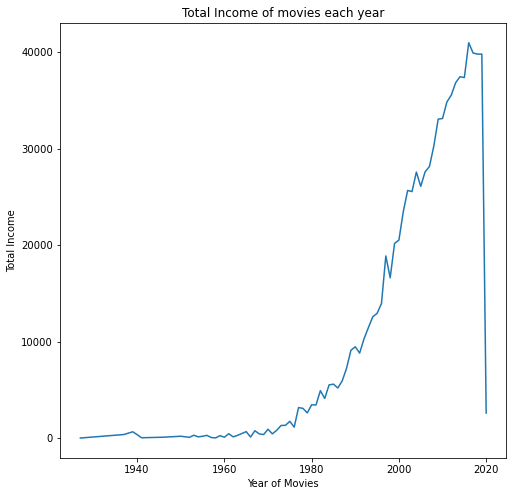

In [28]:
fmovies_income.plot(figsize = (8,8), title = 'Total Income of movies each year', xlabel = 'Year of Movies', ylabel = 'Total Income')

In [29]:
fmovies_budget= fmovies.groupby('year')['budget'].sum()
fmovies_budget.head()

year
1927    6.0
1937    1.0
1939    5.0
1940    4.0
1941    1.0
Name: budget, dtype: float64

<AxesSubplot:title={'center':'Total budget of movies each year'}, xlabel='Year of Movies', ylabel=' Budget'>

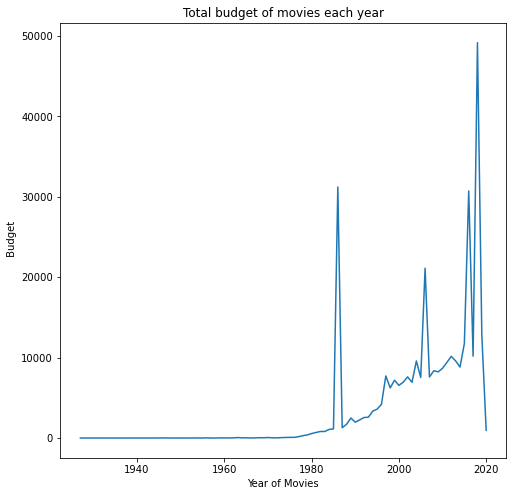

In [30]:
fmovies_budget.plot(figsize = (8,8), title = 'Total budget of movies each year', xlabel = 'Year of Movies', ylabel = ' Budget')

In [31]:
fmovies_profit = fmovies.groupby('year')['Profit'].sum()

<AxesSubplot:title={'center':'Total Profit of movies each year'}, xlabel='Year of Movies', ylabel=' Profit '>

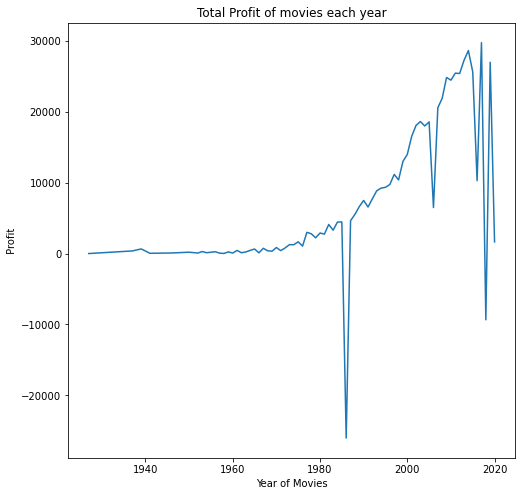

In [32]:
fmovies_profit.plot(figsize = (8,8), title = 'Total Profit of movies each year', xlabel = 'Year of Movies', ylabel = ' Profit ')

In [33]:
#Similarly we will find the top 10 profitable movies 
profit_movies = fmovies.sort_values(by = 'Profit', ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Avengers: Endgame'),
  Text(2, 0, 'Star Wars: Episode VII - The Force Awakens'),
  Text(3, 0, 'Titanic'),
  Text(4, 0, 'Avengers: Infinity War'),
  Text(5, 0, 'Jurassic World'),
  Text(6, 0, 'The Lion King'),
  Text(7, 0, 'The Avengers'),
  Text(8, 0, 'Black Panther'),
  Text(9, 0, 'Frozen II')])

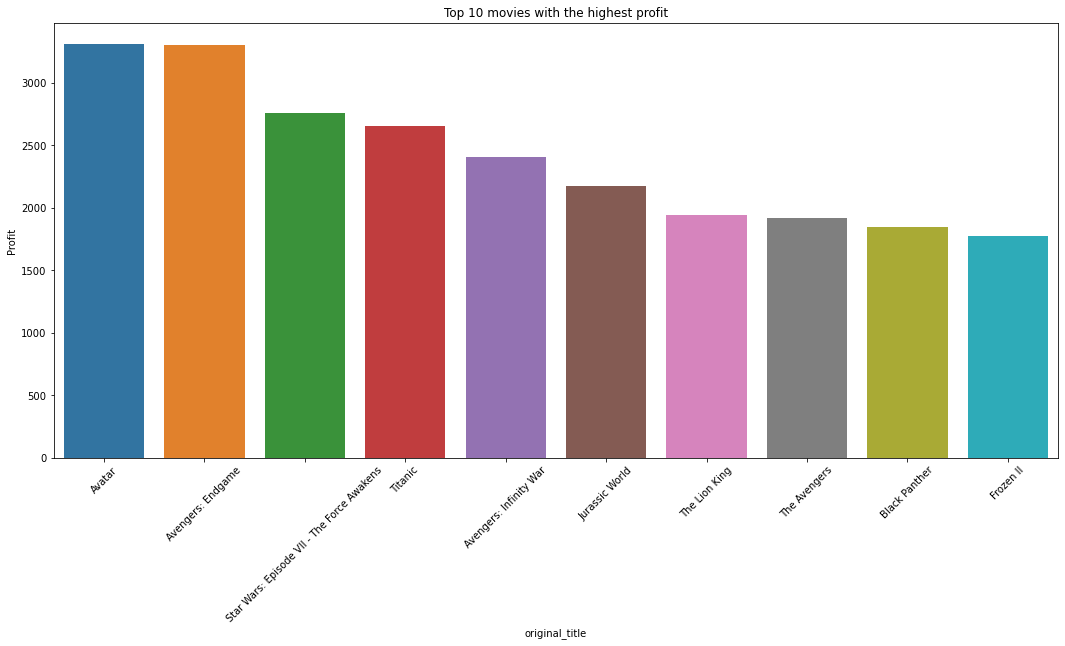

In [34]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="Profit", data=profit_movies).set_title('Top 10 movies with the highest profit')
plt.xticks(rotation=45)



## Let's find the movies with negative profit

In [35]:
neg_profit_movies = fmovies[fmovies['Profit']<0]

In [36]:
neg_profit_movies = neg_profit_movies.sort_values(by = 'Profit', ascending = True).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sin-gwa ham-kke: In-gwa yeon'),
  Text(1, 0, 'Der Name der Rose'),
  Text(2, 0, 'Gwoemul'),
  Text(3, 0, 'Ah-ga-ssi'),
  Text(4, 0, 'Busanhaeng'),
  Text(5, 0, '2.0'),
  Text(6, 0, 'Saaho'),
  Text(7, 0, 'Mononoke-hime'),
  Text(8, 0, 'Bãhubali 2: The Conclusion'),
  Text(9, 0, 'Inosensu: Innocence')])

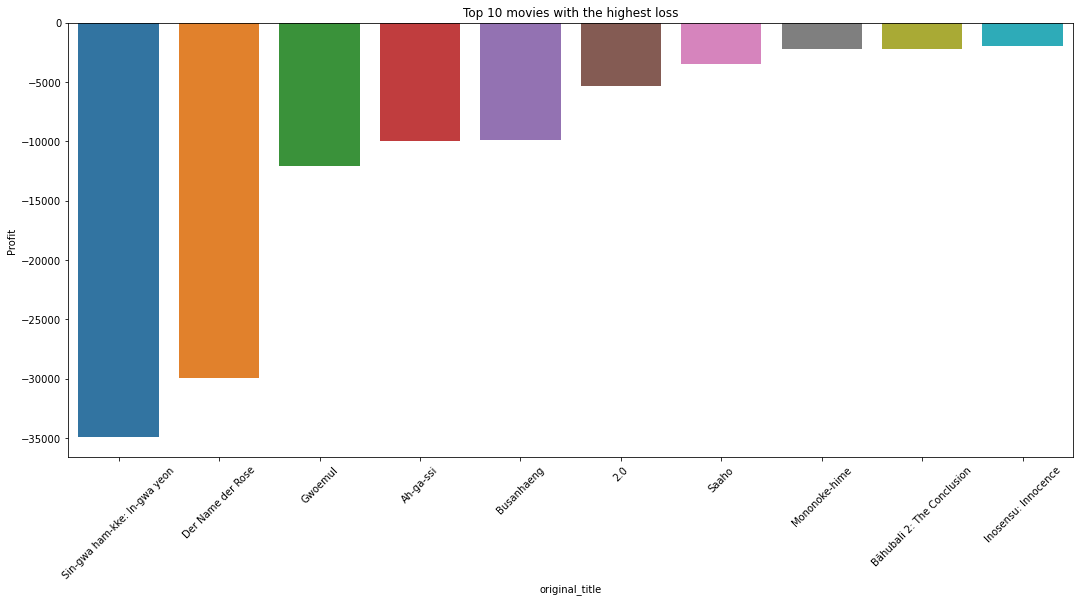

In [37]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="Profit", data=neg_profit_movies).set_title('Top 10 movies with the highest loss')
plt.xticks(rotation=45)



## Now let's examine what makes a movie profitable

In [38]:
#We will take the first 1000 profitable movies as to have a larger sample
profit_movies = fmovies.sort_values(by = 'Profit', ascending = False).head(1000)

In [39]:
profit_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,7.8,1101160,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,8.4,754786,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,7.9,845102,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,7.8,1023181,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,8.4,796486,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0


### 1) Choosing a director
### Here we will find the director whose movies make the largest profit

In [40]:
profit_movies['director'].value_counts()

Steven Spielberg    23
Robert Zemeckis      9
Ron Howard           9
Michael Bay          9
Tim Burton           8
                    ..
Brian Fee            1
Peter Ramsey         1
Chris Miller         1
Michael Engler       1
Chris Noonan         1
Name: director, Length: 517, dtype: int64

In [41]:
dir_profit = profit_movies.groupby('director')['Profit'].sum()

In [42]:
dir_profit = dir_profit.sort_values(ascending = False).head(10)

<AxesSubplot:title={'center':'Most profitable directors'}, xlabel='Director', ylabel='Total Profit'>

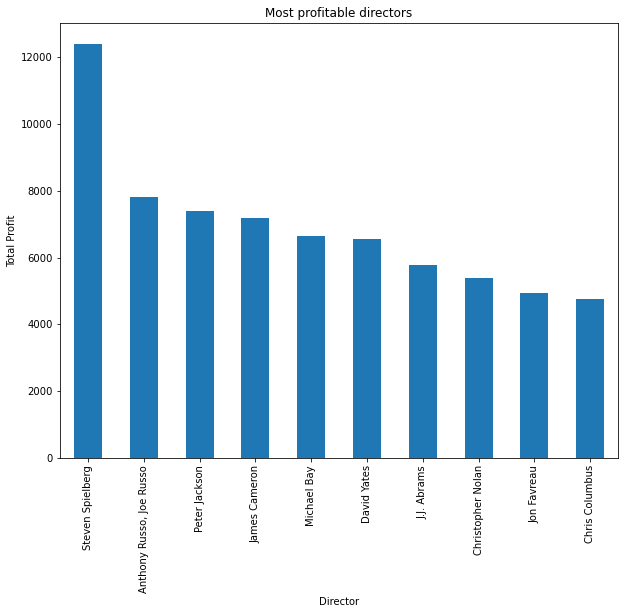

In [43]:
dir_profit.plot.bar(xlabel = 'Director', ylabel = 'Total Profit', figsize = [10,8], title = "Most profitable directors")

## 2) Writer
### Here we will find the writers that are most frequent among the top profitable movies

In [44]:
profit_movies['writer'].value_counts()

M. Night Shyamalan                     7
Jonathan Aibel, Glenn Berger           6
Cinco Paul, Ken Daurio                 6
Christopher Markus, Stephen McFeely    6
Melissa Rosenberg, Stephenie Meyer     5
                                      ..
Stephen King, Frank Darabont           1
Justin Theroux, Stan Lee               1
Hugh Lofting, Nat Mauldin              1
Michael Blake, Michael Blake           1
Jason Hall, Chris Kyle                 1
Name: writer, Length: 855, dtype: int64

In [45]:
profit_movies['writer_II'] = profit_movies['writer'].str.split(',')

In [46]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [47]:
writers = to_1D(profit_movies['writer_II'])

In [48]:
writers = writers.value_counts().head(10)

In [49]:
writers

John Lasseter         8
M. Night Shyamalan    7
Christopher Markus    6
 Glenn Berger         6
Quentin Tarantino     6
Jonathan Aibel        6
 J.K. Rowling         6
Ehren Kruger          6
 Ken Daurio           6
 Akiva Goldsman       6
dtype: int64

<AxesSubplot:title={'center':'Occurences of writers in profitable movies'}, xlabel='Writers', ylabel='Occurence'>

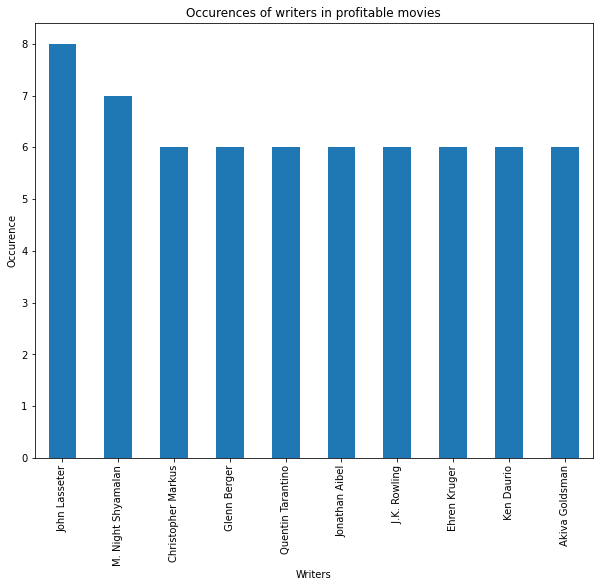

In [50]:
writers.plot.bar(xlabel = 'Writers', ylabel = 'Occurence', figsize = [10,8], title = 'Occurences of writers in profitable movies')



## 2) Genre
### Here we will find the genres that are most frequent among the top profitable movies

In [51]:
profit_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit,writer_II
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,1101160,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0,[James Cameron]
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,754786,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0,"[Christopher Markus, Stephen McFeely]"
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,845102,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0,"[Lawrence Kasdan, J.J. Abrams]"
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,1023181,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0,[James Cameron]
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,796486,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0,"[Christopher Markus, Stephen McFeely]"


In [52]:
profit_movies['genre'].value_counts()

Animation, Adventure, Comedy    88
Action, Adventure, Sci-Fi       79
Action, Adventure, Fantasy      40
Action, Adventure, Comedy       36
Comedy, Drama, Romance          32
                                ..
Drama, Horror, Thriller          1
Comedy, Drama, Music             1
Family, Sci-Fi                   1
Action, Adventure, History       1
Action, Drama, Sport             1
Name: genre, Length: 167, dtype: int64

In [53]:
profit_movies['genre'] = profit_movies['genre'].str.replace(' ', '')

In [54]:
profit_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit,writer_II
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action,Adventure,Fantasy",162,USA,"English, Spanish",James Cameron,...,1101160,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0,[James Cameron]
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action,Adventure,Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,754786,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0,"[Christopher Markus, Stephen McFeely]"
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action,Adventure,Sci-Fi",138,USA,English,J.J. Abrams,...,845102,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0,"[Lawrence Kasdan, J.J. Abrams]"
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama,Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,1023181,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0,[James Cameron]
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action,Adventure,Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,796486,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0,"[Christopher Markus, Stephen McFeely]"


In [55]:
profit_movies["genre_II"] = profit_movies['genre'].str.split(',')

In [56]:
profit_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit,writer_II,genre_II
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action,Adventure,Fantasy",162,USA,"English, Spanish",James Cameron,...,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0,[James Cameron],"[Action, Adventure, Fantasy]"
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action,Adventure,Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0,"[Christopher Markus, Stephen McFeely]","[Action, Adventure, Drama]"
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action,Adventure,Sci-Fi",138,USA,English,J.J. Abrams,...,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0,"[Lawrence Kasdan, J.J. Abrams]","[Action, Adventure, Sci-Fi]"
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama,Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0,[James Cameron],"[Drama, Romance]"
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action,Adventure,Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0,"[Christopher Markus, Stephen McFeely]","[Action, Adventure, Sci-Fi]"


In [57]:
genres = to_1D(profit_movies['genre_II'])

In [58]:
genres = genres.value_counts()

In [59]:
genres

Adventure    436
Action       414
Comedy       396
Drama        324
Thriller     158
Animation    144
Sci-Fi       134
Crime        122
Fantasy      118
Romance      116
Family       111
Mystery       66
Horror        54
Biography     44
History       22
Sport         16
Music         15
War           11
Musical       10
Western        7
dtype: int64

<AxesSubplot:title={'center':'Occurences of genres in profitable movies'}, xlabel='Genre', ylabel='Occurence'>

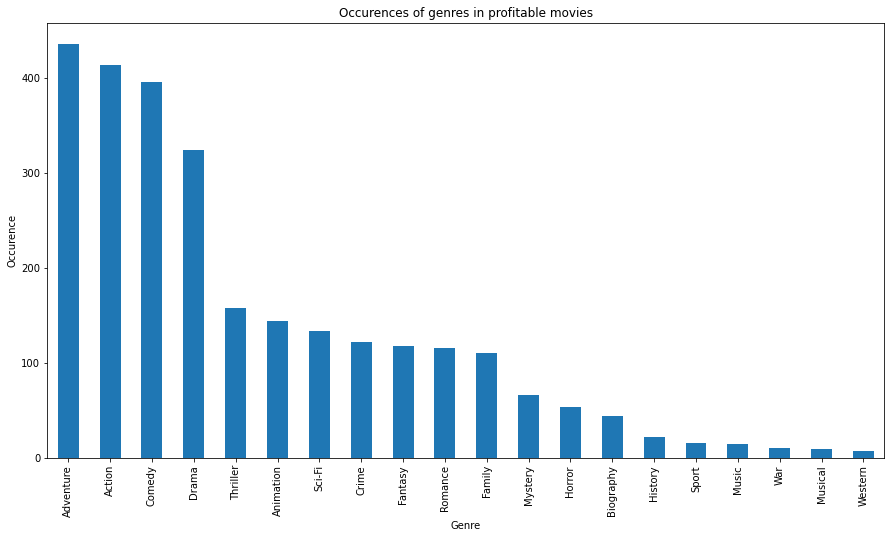

In [60]:
genres.plot.bar(xlabel = 'Genre', ylabel = 'Occurence', figsize = [15,8], title = 'Occurences of genres in profitable movies')


## 3) Actors
### Here we will find the actors who star more frequently in the most profitable movies

In [61]:
profit_movies['actors_II'] = profit_movies['actors'].str.split(',')

In [62]:
actors = to_1D(profit_movies['actors_II'])

In [63]:
actors = actors.value_counts()

In [64]:
actors.head(10)

 Samuel L. Jackson    29
Tom Cruise            22
 Morgan Freeman       20
Tom Hanks             19
Adam Sandler          17
 Jon Favreau          15
Jim Carrey            14
 Alan Tudyk           14
 Anne Hathaway        13
 Woody Harrelson      13
dtype: int64

<AxesSubplot:title={'center':'Occurences of actors in profitable movies'}, xlabel='Actors', ylabel='Occurence'>

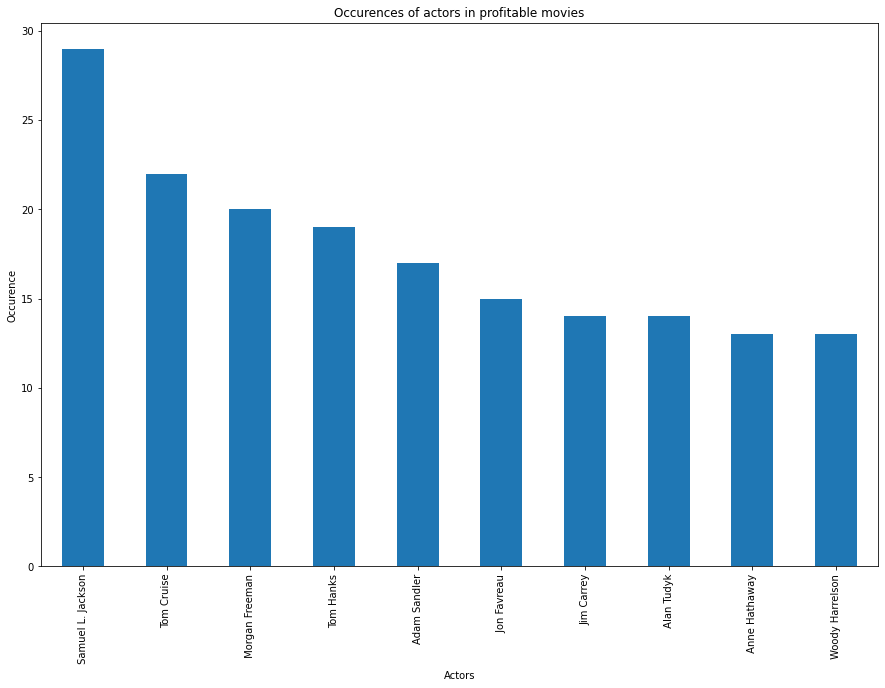

In [65]:
actors.head(10).plot.bar(xlabel = 'Actors', ylabel = 'Occurence', figsize = [15,10], title = 'Occurences of actors in profitable movies')



## 4) As a final analysis we will examine which month do more successfull movies get released

In [66]:
month_movies = fmovies.sort_values(by = 'Profit', ascending = False)

In [67]:
month_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,7.8,1101160,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,8.4,754786,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,7.9,845102,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,7.8,1023181,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,8.4,796486,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0


In [68]:
month_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 49415 to 83792
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5820 non-null   object 
 1   title                  5820 non-null   object 
 2   original_title         5820 non-null   object 
 3   year                   5820 non-null   int64  
 4   date_published         5820 non-null   object 
 5   genre                  5820 non-null   object 
 6   duration               5820 non-null   int64  
 7   country                5820 non-null   object 
 8   language               5819 non-null   object 
 9   director               5820 non-null   object 
 10  writer                 5820 non-null   object 
 11  production_company     5810 non-null   object 
 12  actors                 5820 non-null   object 
 13  description            5808 non-null   object 
 14  avg_vote               5820 non-null   float64
 15 

In [69]:
month_movies['date_published'] = month_movies['date_published'].replace('[a-zA-z]', '',regex = True)



In [70]:
month_movies['date_published'] = pd.to_datetime(month_movies['date_published'])

In [71]:
month_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 49415 to 83792
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_title_id          5820 non-null   object        
 1   title                  5820 non-null   object        
 2   original_title         5820 non-null   object        
 3   year                   5820 non-null   int64         
 4   date_published         5820 non-null   datetime64[ns]
 5   genre                  5820 non-null   object        
 6   duration               5820 non-null   int64         
 7   country                5820 non-null   object        
 8   language               5819 non-null   object        
 9   director               5820 non-null   object        
 10  writer                 5820 non-null   object        
 11  production_company     5810 non-null   object        
 12  actors                 5820 non-null   object        
 13

In [72]:
import datetime
month_movies['Month'] = month_movies['date_published'].dt.month

In [73]:
month_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 49415 to 83792
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_title_id          5820 non-null   object        
 1   title                  5820 non-null   object        
 2   original_title         5820 non-null   object        
 3   year                   5820 non-null   int64         
 4   date_published         5820 non-null   datetime64[ns]
 5   genre                  5820 non-null   object        
 6   duration               5820 non-null   int64         
 7   country                5820 non-null   object        
 8   language               5819 non-null   object        
 9   director               5820 non-null   object        
 10  writer                 5820 non-null   object        
 11  production_company     5810 non-null   object        
 12  actors                 5820 non-null   object        
 13

In [74]:
profit_by_month = month_movies.groupby('Month')['Profit'].sum()

<AxesSubplot:title={'center':'Total Profit Made Each Month'}, xlabel='Month', ylabel='Profit Made '>

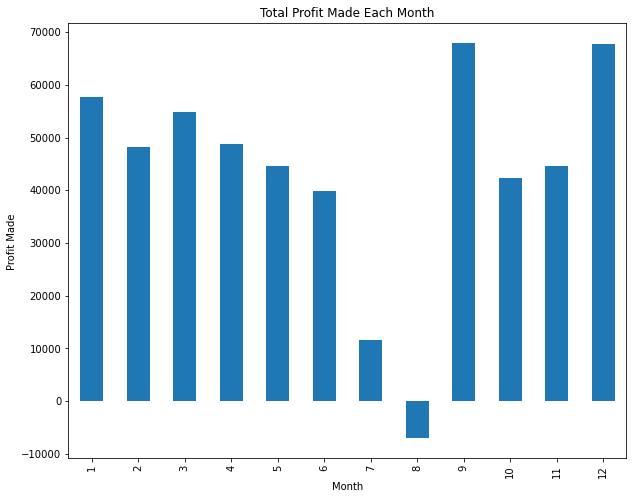

In [75]:
profit_by_month.plot(kind = 'bar', figsize = [10,8], xlabel = 'Month', ylabel = 'Profit Made ', title = 'Total Profit Made Each Month')

### Now let's see, out of the top 100 movies profit-wise, which month did most of them come out?

In [76]:
top50 = month_movies.head(50)
top100 = month_movies.head(100)
top20 = month_movies.head(20)
top1000 = month_movies.head(1000)

In [77]:
top50

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Total Income,Profit,Month
49415,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,1101160,237.0,760.0,2790.0,83.0,3442.0,733.0,3550.0,3313.0,1
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,754786,356.0,858.0,2797.0,78.0,8869.0,557.0,3655.0,3299.0,4
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,845102,245.0,936.0,2068.0,80.0,4822.0,909.0,3004.0,2759.0,12
31086,tt0120338,Titanic,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada","English, Swedish, Italian, French",James Cameron,...,1023181,200.0,659.0,2195.0,75.0,2884.0,331.0,2854.0,2654.0,1
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,796486,321.0,678.0,2048.0,68.0,4273.0,611.0,2726.0,2405.0,4
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,569512,150.0,652.0,1670.0,59.0,1537.0,698.0,2322.0,2172.0,6
79633,tt6105098,Il Re Leone,The Lion King,2019,2019-08-21,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,...,199521,260.0,543.0,1656.0,55.0,2898.0,370.0,2199.0,1939.0,8
50773,tt0848228,The Avengers,The Avengers,2012,2012-04-25,"Action, Adventure, Sci-Fi",143,USA,"English, Russian, Hindi",Joss Whedon,...,1241220,220.0,623.0,1518.0,69.0,1934.0,755.0,2141.0,1921.0,4
62334,tt1825683,Black Panther,Black Panther,2018,2018-02-14,"Action, Adventure, Sci-Fi",134,USA,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler,...,597058,200.0,700.0,1347.0,88.0,3243.0,685.0,2047.0,1847.0,2
74934,tt4520988,Frozen II - Il segreto di Arendelle,Frozen II,2019,2019-11-27,"Animation, Adventure, Comedy",103,USA,English,"Chris Buck, Jennifer Lee",...,122760,150.0,477.0,1450.0,64.0,1302.0,275.0,1927.0,1777.0,11


In [78]:
monthly50 = top50['Month'].value_counts()
monthly20 = top20['Month'].value_counts()
monthly100 = top100['Month'].value_counts()
monthly1000 = top1000['Month'].value_counts()


12    8
4     7
1     6
9     5
6     4
7     4
8     4
10    4
2     2
3     2
5     2
11    2
Name: Month, dtype: int64


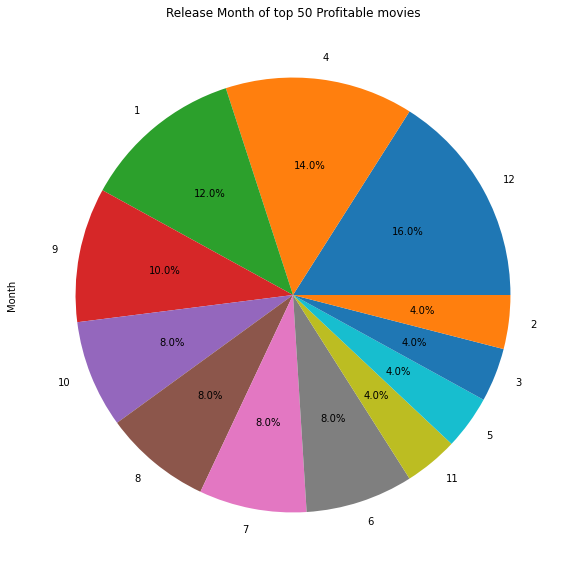

In [79]:

monthly50.plot(kind = 'pie', figsize = [10,10], title = 'Release Month of top 50 Profitable movies',autopct='%1.1f%%' )
print(monthly50.sort_values(ascending = False))

4     6
1     3
12    3
6     2
2     1
3     1
7     1
8     1
9     1
11    1
Name: Month, dtype: int64


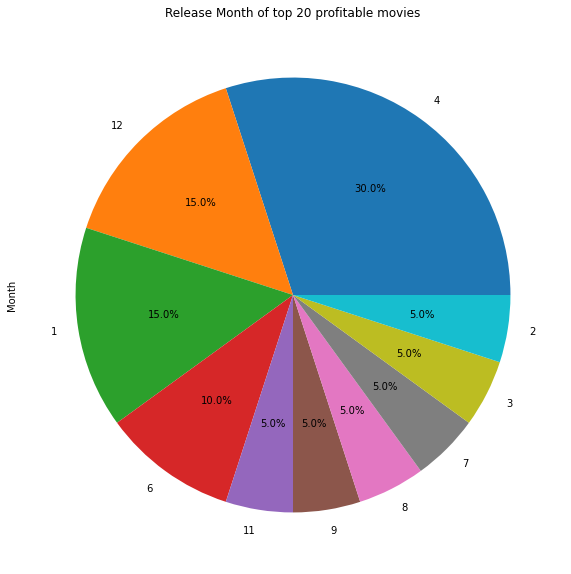

In [80]:
monthly20.plot(kind = 'pie', figsize = [10,10], title = 'Release Month of top 20 profitable movies', autopct='%1.1f%%')
print(monthly20.sort_values(ascending = False))

12    14
10    11
4     10
9     10
5      9
6      9
11     9
7      8
1      7
8      6
3      4
2      3
Name: Month, dtype: int64


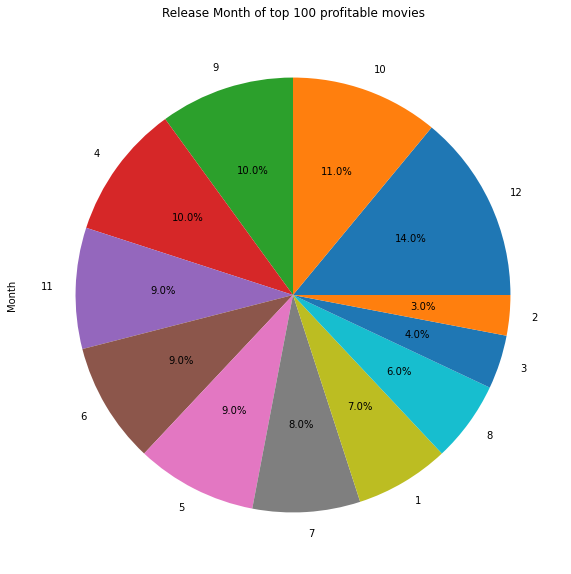

In [81]:
monthly100.plot(kind = 'pie', figsize = [10,10], title = 'Release Month of top 100 profitable movies', autopct='%1.1f%%')
print(monthly100.sort_values(ascending = False))

10    119
9     118
12    115
3      97
1      96
2      84
11     76
4      70
5      68
8      61
6      48
7      48
Name: Month, dtype: int64


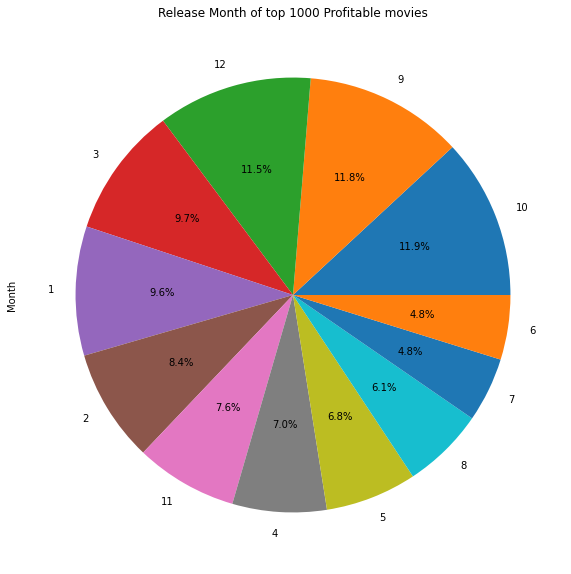

In [82]:
monthly1000.plot(kind = 'pie', figsize = [10,10], title = 'Release Month of top 1000 Profitable movies',autopct='%1.1f%%' )
print(monthly1000.sort_values(ascending = False))

## 5. Duration of the top 100 most profitable movies

In [83]:
duration_movies1000 = fmovies.sort_values(by = 'Profit', ascending = False).head(1000)
duration_movies100 = fmovies.sort_values(by = 'Profit', ascending = False).head(100)
duration_movies50 = fmovies.sort_values(by = 'Profit', ascending = False).head(50)
duration_movies20 = fmovies.sort_values(by = 'Profit', ascending = False).head(20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration of the top 1000 profitable movies')

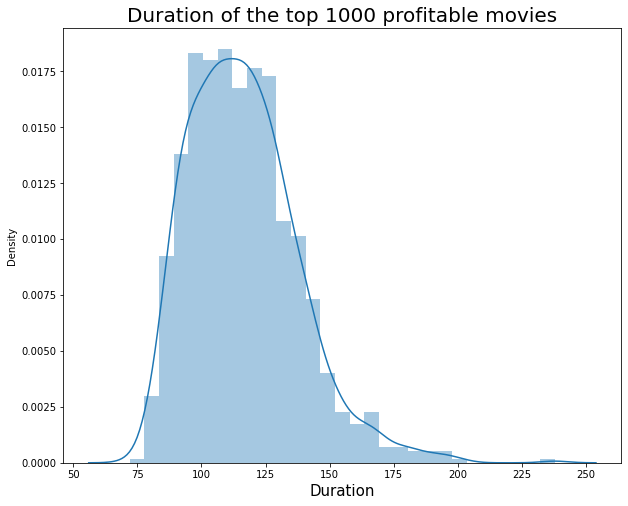

In [84]:
plt.figure(figsize = [10,8])
dist = sns.distplot(duration_movies1000['duration'])
dist.set_xlabel('Duration', fontsize = 15)
dist.set_title('Duration of the top 1000 profitable movies', fontsize = 20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration of the top 100 profitable movies')

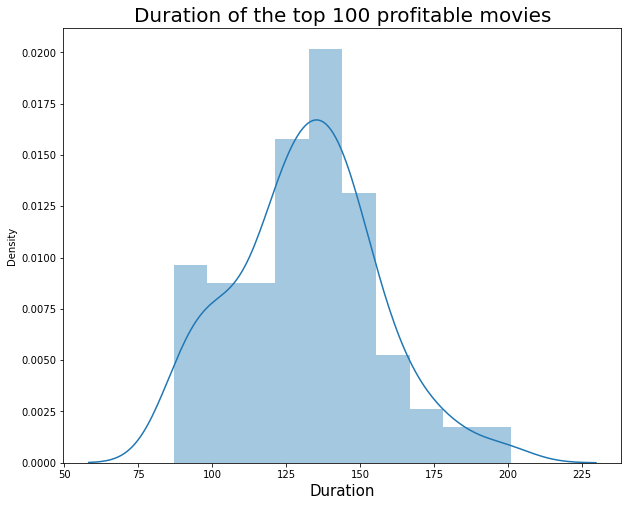

In [85]:
plt.figure(figsize = [10,8])
dist = sns.distplot(duration_movies100['duration'])
dist.set_xlabel('Duration', fontsize = 15)
dist.set_title('Duration of the top 100 profitable movies', fontsize = 20)

In [86]:
print(duration_movies20['duration'].mean())
print(duration_movies50['duration'].mean())
print(duration_movies100['duration'].mean())
print(duration_movies1000['duration'].mean())


140.7
130.88
131.78
116.462


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration of the top 50 profitable movies')

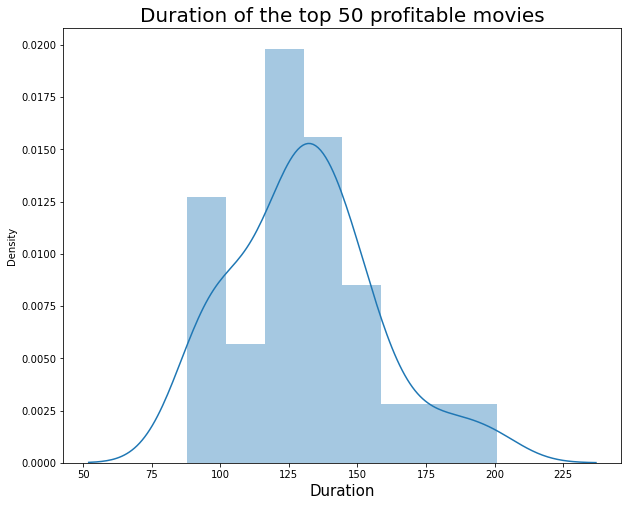

In [87]:
plt.figure(figsize = [10,8])
dist = sns.distplot(duration_movies50['duration'])
dist.set_xlabel('Duration', fontsize = 15)
dist.set_title('Duration of the top 50 profitable movies', fontsize = 20)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration of the top 20 profitable movies')

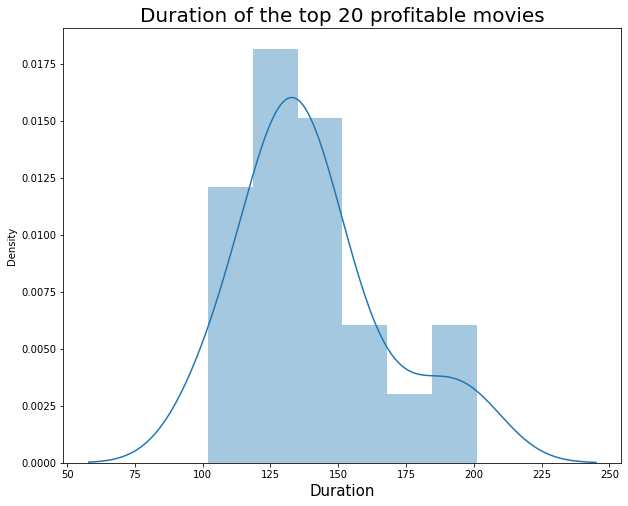

In [88]:
plt.figure(figsize = [10,8])
dist = sns.distplot(duration_movies20['duration'])
dist.set_xlabel('Duration', fontsize = 15)
dist.set_title('Duration of the top 20 profitable movies', fontsize = 20)

In [89]:
fmovies.to_csv('/Users/traulosspyros/Desktop/Big Blue Data Academy/spyros-travlos-exercises/IMDb_dash', index = False)